In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt  ## Plots and charts
import seaborn as sns

In [2]:
df = pd.read_excel('excel_data.xlsx')

In [3]:
df.head(10)

account                              name  \
0   211829        Kerluke, Koepp and Hilpert   
1   320563                    Walter-Trantow   
2   648336        Bashirian, Kunde and Price   
3   109996       D'Amore, Gleichner and Bode   
4   121213                     Bauch-Goldner   
5   132971  Williamson, Schumm and Hettinger   
6   145068                        Casper LLC   
7   205217                  Kovacek-Johnston   
8   209744                    Champlin-Morar   
9   212303                    Gerhold-Maggio   

                                 street               city          state  \
0                    34456 Sean Highway         New Jaycob          Texas   
1                     1311 Alvis Tunnel      Port Khadijah  NorthCarolina   
2  62184 Schamberger Underpass Apt. 231     New Lilianland           Iowa   
3           155 Fadel Crescent Apt. 144         Hyattburgh          Maine   
4                   7274 Marissa Common    Shanahanchester     California   
5                  89403 Casimer Spring       Jeremieburgh       Arkansas   
6          340 Consuela Bridge Apt. 400  Lake Gabriellaton     Mississipi   
7          91971 Cronin Vista Suite 601         Deronville    RhodeIsland   
8                      26739 Grant Lock    Lake Juliannton   Pennsylvania   
9             366 Maggio Grove Apt. 998          North Ras          Idaho   

   postal-code     Jan     Feb    Mar  
0        28752   10000   62000  35000  
1        38365   95000   45000  35000  
2        76517   91000  120000  35000  
3        46021   45000  120000  10000  
4        49681  162000  120000  35000  
5        62785  150000  120000  35000  
6        18008   62000  120000  70000  
7        53461  145000   95000  35000  
8        64415   70000   95000  35000  
9        46308   70000  120000  35000

### Adding columns to make a new column

In [4]:
df['Total'] = df['Jan'] + df['Feb'] + df['Mar']

In [5]:
df.head()

account                         name                                street  \
0   211829   Kerluke, Koepp and Hilpert                    34456 Sean Highway   
1   320563               Walter-Trantow                     1311 Alvis Tunnel   
2   648336   Bashirian, Kunde and Price  62184 Schamberger Underpass Apt. 231   
3   109996  D'Amore, Gleichner and Bode           155 Fadel Crescent Apt. 144   
4   121213                Bauch-Goldner                   7274 Marissa Common   

              city          state  postal-code     Jan     Feb    Mar   Total  
0       New Jaycob          Texas        28752   10000   62000  35000  107000  
1    Port Khadijah  NorthCarolina        38365   95000   45000  35000  175000  
2   New Lilianland           Iowa        76517   91000  120000  35000  246000  
3       Hyattburgh          Maine        46021   45000  120000  10000  175000  
4  Shanahanchester     California        49681  162000  120000  35000  317000

In [6]:
df['Jan'].mean()

97466.666666666672

In [7]:
# See your numerical statisics at a glance
df[['Jan', 'Feb', 'Mar', 'Total']].describe()

Jan            Feb            Mar          Total
count      15.000000      15.000000      15.000000      15.000000
mean    97466.666667  100466.666667   47800.000000  245733.333333
std     51159.228558   34450.516618   34996.326338   67072.952465
min     10000.000000   10000.000000   10000.000000  107000.000000
25%     58500.000000   95000.000000   35000.000000  205000.000000
50%     91000.000000  120000.000000   35000.000000  246000.000000
75%    150000.000000  120000.000000   45000.000000  311000.000000
max    162000.000000  120000.000000  162000.000000  340000.000000

### Creating a categorical variable

In [8]:
# Putting some simple if-then logic into a func to apply to a column
def make_catagorical_vars(x):
    if x < 205000:
        return "SMALL"
    elif  x <= 250000:
        return "MEDIUM"
    elif x <= 311000:
        return "BIG"
    else:
        return "HUGE"

In [9]:
# The output of the apply function goes into making our 'Sizes' column
df['Sizes'] = df['Total'].apply(make_catagorical_vars)

In [10]:
df.head()

account                         name                                street  \
0   211829   Kerluke, Koepp and Hilpert                    34456 Sean Highway   
1   320563               Walter-Trantow                     1311 Alvis Tunnel   
2   648336   Bashirian, Kunde and Price  62184 Schamberger Underpass Apt. 231   
3   109996  D'Amore, Gleichner and Bode           155 Fadel Crescent Apt. 144   
4   121213                Bauch-Goldner                   7274 Marissa Common   

              city          state  postal-code     Jan     Feb    Mar   Total  \
0       New Jaycob          Texas        28752   10000   62000  35000  107000   
1    Port Khadijah  NorthCarolina        38365   95000   45000  35000  175000   
2   New Lilianland           Iowa        76517   91000  120000  35000  246000   
3       Hyattburgh          Maine        46021   45000  120000  10000  175000   
4  Shanahanchester     California        49681  162000  120000  35000  317000   

    Sizes  
0   SMALL  
1   SMALL  
2  MEDIUM  
3   SMALL  
4    HUGE

## Filtering!

In [11]:
# Filtering for categorical data
df[df['Sizes'].isin(['SMALL', 'MEDIUM'])]

account                         name  \
0    211829   Kerluke, Koepp and Hilpert   
1    320563               Walter-Trantow   
2    648336   Bashirian, Kunde and Price   
3    109996  D'Amore, Gleichner and Bode   
8    209744               Champlin-Morar   
9    212303               Gerhold-Maggio   
10   214098  Goodwin, Homenick and Jerde   
13   268755                  Walsh-Haley   

                                  street             city          state  \
0                     34456 Sean Highway       New Jaycob          Texas   
1                      1311 Alvis Tunnel    Port Khadijah  NorthCarolina   
2   62184 Schamberger Underpass Apt. 231   New Lilianland           Iowa   
3            155 Fadel Crescent Apt. 144       Hyattburgh          Maine   
8                       26739 Grant Lock  Lake Juliannton   Pennsylvania   
9              366 Maggio Grove Apt. 998        North Ras          Idaho   
10             649 Cierra Forks Apt. 078         Rosaberg       Tenessee   
13                  2624 Beatty Parkways     Goodwinmouth    RhodeIsland   

    postal-code    Jan     Feb    Mar   Total   Sizes  
0         28752  10000   62000  35000  107000   SMALL  
1         38365  95000   45000  35000  175000   SMALL  
2         76517  91000  120000  35000  246000  MEDIUM  
3         46021  45000  120000  10000  175000   SMALL  
8         64415  70000   95000  35000  200000   SMALL  
9         46308  70000  120000  35000  225000  MEDIUM  
10        47743  45000  120000  55000  220000  MEDIUM  
13        31919  55000  120000  35000  210000  MEDIUM

In [12]:
# Filtering on more than one field
df[(df['Total'] > 250000) & (df['Sizes'] == 'BIG')]

account                              name                        street  \
5   132971  Williamson, Schumm and Hettinger          89403 Casimer Spring   
6   145068                        Casper LLC  340 Consuela Bridge Apt. 400   
7   205217                  Kovacek-Johnston  91971 Cronin Vista Suite 601   

                city        state  postal-code     Jan     Feb    Mar   Total  \
5       Jeremieburgh     Arkansas        62785  150000  120000  35000  305000   
6  Lake Gabriellaton   Mississipi        18008   62000  120000  70000  252000   
7         Deronville  RhodeIsland        53461  145000   95000  35000  275000   

  Sizes  
5   BIG  
6   BIG  
7   BIG

### Pivoting
We discovered that you can keep non-numerical data in a pivot table by including it in the `index`

In [13]:
pd.pivot_table(df, index=["Sizes", 'account'], values=['Total'], aggfunc=np.sum).reset_index()

Sizes  account   Total
0      BIG   132971  305000
1      BIG   145068  252000
2      BIG   205217  275000
3     HUGE   121213  317000
4     HUGE   231907  322000
5     HUGE   242368  317000
6     HUGE   273274  340000
7   MEDIUM   212303  225000
8   MEDIUM   214098  220000
9   MEDIUM   268755  210000
10  MEDIUM   648336  246000
11   SMALL   109996  175000
12   SMALL   209744  200000
13   SMALL   211829  107000
14   SMALL   320563  175000

### Groupby
We discovered that Groupby only works with numerical data

In [14]:
df[['Total', 'Sizes']].groupby('Sizes').sum()  # you can do many aggregations here

Total
Sizes          
BIG      832000
HUGE    1296000
MEDIUM   901000
SMALL    657000

### Melt 'n merge!

In [15]:
long_df = pd.melt(df, id_vars=['account'], value_vars=['Jan', 'Feb', 'Mar'])

In [16]:
# Here we do a SQL-like join on the 'account' field
merged_df = pd.merge(df, long_df, on='account')

In [17]:
long_df

account variable   value
0    211829      Jan   10000
1    320563      Jan   95000
2    648336      Jan   91000
3    109996      Jan   45000
4    121213      Jan  162000
5    132971      Jan  150000
6    145068      Jan   62000
7    205217      Jan  145000
8    209744      Jan   70000
9    212303      Jan   70000
10   214098      Jan   45000
11   231907      Jan  150000
12   242368      Jan  162000
13   268755      Jan   55000
14   273274      Jan  150000
15   211829      Feb   62000
16   320563      Feb   45000
17   648336      Feb  120000
18   109996      Feb  120000
19   121213      Feb  120000
20   132971      Feb  120000
21   145068      Feb  120000
22   205217      Feb   95000
23   209744      Feb   95000
24   212303      Feb  120000
25   214098      Feb  120000
26   231907      Feb   10000
27   242368      Feb  120000
28   268755      Feb  120000
29   273274      Feb  120000
30   211829      Mar   35000
31   320563      Mar   35000
32   648336      Mar   35000
33   109996      Mar   10000
34   121213      Mar   35000
35   132971      Mar   35000
36   145068      Mar   70000
37   205217      Mar   35000
38   209744      Mar   35000
39   212303      Mar   35000
40   214098      Mar   55000
41   231907      Mar  162000
42   242368      Mar   35000
43   268755      Mar   35000
44   273274      Mar   70000

In [18]:
# Going back from a melt to a regular table
temp_df = pd.pivot_table(long_df, index=['account'], columns='variable')
temp_df.columns = temp_df.columns.droplevel().rename(None)
temp_df.reset_index(inplace=True)

### Formatting

In [19]:
def format_as_money(x):
    return "${:,.0f}".format(x)

In [20]:
# pandas applymap applies a function to every element in the dataframe
temp_df.applymap(format_as_money)

account       Feb       Jan       Mar
0   $109,996  $120,000   $45,000   $10,000
1   $121,213  $120,000  $162,000   $35,000
2   $132,971  $120,000  $150,000   $35,000
3   $145,068  $120,000   $62,000   $70,000
4   $205,217   $95,000  $145,000   $35,000
5   $209,744   $95,000   $70,000   $35,000
6   $211,829   $62,000   $10,000   $35,000
7   $212,303  $120,000   $70,000   $35,000
8   $214,098  $120,000   $45,000   $55,000
9   $231,907   $10,000  $150,000  $162,000
10  $242,368  $120,000  $162,000   $35,000
11  $268,755  $120,000   $55,000   $35,000
12  $273,274  $120,000  $150,000   $70,000
13  $320,563   $45,000   $95,000   $35,000
14  $648,336  $120,000   $91,000   $35,000

### Visualizing

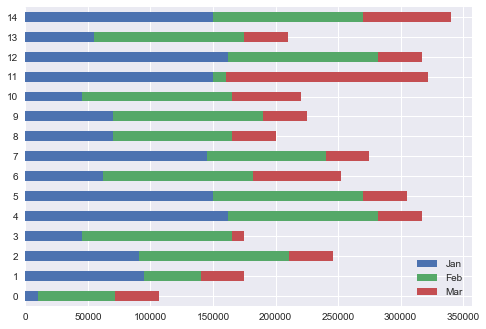

In [21]:
df[['Jan', 'Feb', 'Mar']].plot.barh(stacked=True);

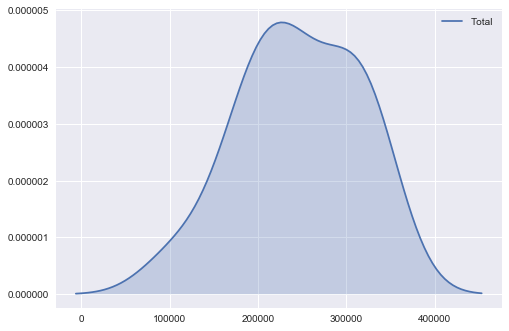

In [22]:
# Density histogram
sns.kdeplot(df['Total'], shade=True);

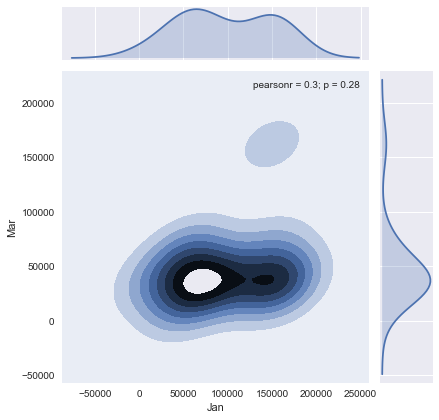

In [23]:
# Joint density plot
sns.jointplot(x="Jan", y="Mar", data=df, kind="kde");

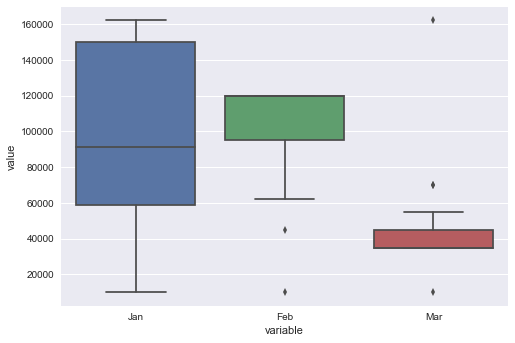

In [24]:
# Boxplots to see dispersion
sns.boxplot(x="variable", y="value", data=merged_df);

### Writing out your dataframes to csv, excel, clipboard, ...etc.

In [ ]:
merged_df.to_csv('my_file_name.csv', index=False)  # I like to use index=False

In [ ]:
pd.read_csv('my_file_name.csv')